<a href="https://colab.research.google.com/github/KJM94/pym/blob/main/src/pandas10min.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas new users

## import

In [26]:
import numpy as np
import pandas as pd

# 객체 생성

In [30]:
s = pd.Series([1,3,5,np.nan,6,8])

s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

DataFrameDatetime 인덱스와 레이블이 지정된 열이 있는 Numpy 배열을 전달하여 생성

In [31]:
dates = pd.date_range("20130101", periods=6)

dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [32]:
df = pd.DataFrame(np.random.randn(6,4),index=dates, columns=list("ABCD"))

df

,A,B,C,D
2013-01-01,-1.338161,0.110530,0.536230,2.030842
2013-01-02,0.357603,-0.355747,0.054411,-0.102109
2013-01-03,-0.319073,-1.183950,0.094337,0.616546
2013-01-04,0.350805,1.549371,1.245585,-0.153351
2013-01-05,-0.515572,-2.377644,-0.042456,0.071252
2013-01-06,-0.260635,-1.106064,-1.276920,1.408237


DataFrame 시리즈와 같은 변환을 할 수 있는 개체의 DICT를 전달하여 만들기.

In [ ]:
df2 = pd.DataFrame(
    {
        "A" : 1.0,
        "B" : pd.Timestamp("20130102"),
        "C" : pd.Series(1, index=list(range(4)), dtype="float32"),
        "D" : np.array([3] * 4, dtype="int32"),
        "E" : pd.Categorical(["test","train","test","train"]),
        "F" : "foo"
    }
)

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


그 결과 열 DataFrame은 다른 dtypes를 갖습니다.

In [36]:
df2.dtypes

A    float64
B    float64
dtype: object

# 데이터 보기

프레임의 상단 및 하단 행을 보는 방법

In [37]:
df.head()

,A,B,C,D
2013-01-01,-1.338161,0.110530,0.536230,2.030842
2013-01-02,0.357603,-0.355747,0.054411,-0.102109
2013-01-03,-0.319073,-1.183950,0.094337,0.616546
2013-01-04,0.350805,1.549371,1.245585,-0.153351
2013-01-05,-0.515572,-2.377644,-0.042456,0.071252


In [38]:
df.tail(3)

,A,B,C,D
2013-01-04,0.350805,1.549371,1.245585,-0.153351
2013-01-05,-0.515572,-2.377644,-0.042456,0.071252
2013-01-06,-0.260635,-1.106064,-1.276920,1.408237


색인, 열 표시

In [39]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [40]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

DataFrame.to_numpy()기본 데이터의 Numpy 표현을 제공합니다. DataFrame pandas와 Numpy의 근본적인 차이로 인해 데이터 유형이 다른 열이 있는 경우 이 작업은 비용이 많이들 수 있습니다.
Numpy 배열에는 전체 배열에 대해 하나의 dtype이 있는 반면 pandas DataFrames에는 열당 하나의 dtype이 있습니다. DataFrame.to_numpy()를 호출하면 pandas는 DataFrame의 모든 dtype을 보유할 수 있는 Numpy dtype을 찾습니다. 결국 object 모든 값을 python 객체로 캐스팅해야 하는식으로 끝날 수 있습니다.

df에 대한, DataFrame 모든 부동 소수점 값, DataFrame.to_numpy() 빠르고 및 복사 데이터를 필요로 하지 않는다.

In [41]:
df.to_numpy()

array([[-1.33816087,  0.11053004,  0.53623007,  2.03084207],
       [ 0.35760296, -0.35574745,  0.0544108 , -0.10210902],
       [-0.31907276, -1.18395015,  0.09433678,  0.61654553],
       [ 0.35080472,  1.54937131,  1.24558483, -0.15335078],
       [-0.51557247, -2.37764397, -0.04245553,  0.07125205],
       [-0.26063518, -1.10606377, -1.27691993,  1.40823689]])

df2는 DataFrame 여러 dtype으로, DataFrame.to_numpy() 상대적으로 비싸다.

In [42]:
df2.to_numpy()

array([[-0.37591379,  0.80689645],
       [ 2.71741139, -1.18659735],
       [ 0.34445035,  0.15736656],
       [ 0.21151164,  0.70306021]])

DataFrame.to_numpy()출력에 색인 또는 열 레이블을 포함 하지 않습니다.

describe() 데이터에 대한 빠른 통계 요약을 보여줍니다.

In [43]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.287506,-0.560584,0.101865,0.645236
std,0.629478,1.336571,0.827158,0.897621
min,-1.338161,-2.377644,-1.276920,-0.153351
25%,-0.466448,-1.164479,-0.018239,-0.058769
50%,-0.289854,-0.730906,0.074374,0.343899
75%,0.197945,-0.006039,0.425757,1.210314
max,0.357603,1.549371,1.245585,2.030842


데이터 전치 : 

In [44]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-1.338161,0.357603,-0.319073,0.350805,-0.515572,-0.260635
B,0.110530,-0.355747,-1.183950,1.549371,-2.377644,-1.106064
C,0.536230,0.054411,0.094337,1.245585,-0.042456,-1.276920
D,2.030842,-0.102109,0.616546,-0.153351,0.071252,1.408237


축으로 정렬 : 

In [45]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,2.030842,0.536230,0.110530,-1.338161
2013-01-02,-0.102109,0.054411,-0.355747,0.357603
2013-01-03,0.616546,0.094337,-1.183950,-0.319073
2013-01-04,-0.153351,1.245585,1.549371,0.350805
2013-01-05,0.071252,-0.042456,-2.377644,-0.515572
2013-01-06,1.408237,-1.276920,-1.106064,-0.260635


값으로 정렬 : 

In [46]:
df.sort_values(by="B")

,A,B,C,D
2013-01-05,-0.515572,-2.377644,-0.042456,0.071252
2013-01-03,-0.319073,-1.183950,0.094337,0.616546
2013-01-06,-0.260635,-1.106064,-1.276920,1.408237
2013-01-02,0.357603,-0.355747,0.054411,-0.102109
2013-01-01,-1.338161,0.110530,0.536230,2.030842
2013-01-04,0.350805,1.549371,1.245585,-0.153351


## 선택
- 선택 및 설정을 위한 표준 python / Numpy 표현식은 직관적이고 대화형 작업에 유용하지만 프로덕션 코드의 경우 최적화 된 pandas 데이터 액세스 방법 .at인 .iat, .loc및 .lioc.

## 얻기
단일 열을 선택하면 다음 Series와 같은 결과가 생성됩니다.

In [47]:
df["A"]

2013-01-01   -1.338161
2013-01-02    0.357603
2013-01-03   -0.319073
2013-01-04    0.350805
2013-01-05   -0.515572
2013-01-06   -0.260635
Freq: D, Name: A, dtype: float64

[]행을 분할하는 via를 선택합니다.

In [48]:
df[0:3]

,A,B,C,D
2013-01-01,-1.338161,0.110530,0.536230,2.030842
2013-01-02,0.357603,-0.355747,0.054411,-0.102109
2013-01-03,-0.319073,-1.183950,0.094337,0.616546


In [49]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,0.357603,-0.355747,0.054411,-0.102109
2013-01-03,-0.319073,-1.183950,0.094337,0.616546
2013-01-04,0.350805,1.549371,1.245585,-0.153351


## 라벨로 선택
레이블을 사용하여 횡단면을 얻으려면 : 

In [50]:
df.loc[dates[0]]

A   -1.338161
B    0.110530
C    0.536230
D    2.030842
Name: 2013-01-01 00:00:00, dtype: float64

라벨로 다축 선택 : 

In [51]:
df.loc[:,["A","B"]]

,A,B
2013-01-01,-1.338161,0.110530
2013-01-02,0.357603,-0.355747
2013-01-03,-0.319073,-1.183950
2013-01-04,0.350805,1.549371
2013-01-05,-0.515572,-2.377644
2013-01-06,-0.260635,-1.106064


레이블 슬라이싱을 표시하며 두 엔드 포인트가 모두 포함됩니다.

In [52]:
df.loc["20130102":"20130104",["A","B"]]

,A,B
2013-01-02,0.357603,-0.355747
2013-01-03,-0.319073,-1.183950
2013-01-04,0.350805,1.549371


반환 된 객체의 크기 감소 : 

In [53]:
df.loc["20130102",["A","B"]]

A    0.357603
B   -0.355747
Name: 2013-01-02 00:00:00, dtype: float64

스칼라 값을 얻으려면 : 

In [54]:
df.loc[dates[0], "A"]

-1.3381608728638592

스칼라에 빠르게 액세스하려면 : 

In [55]:
df.at[dates[0], "A"]

-1.3381608728638592

## 위치 별 선택

전달 된 정수의 위치를 통해 선택 : 

In [56]:
df.iloc[3]

A    0.350805
B    1.549371
C    1.245585
D   -0.153351
Name: 2013-01-04 00:00:00, dtype: float64

정수 조각으로 numpy / python과 유사하게 작동합니다.

In [57]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.350805,1.549371
2013-01-05,-0.515572,-2.377644


Numpy / python 스타일과 유사한 정수 위치 목록 : 

In [58]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.357603,0.054411
2013-01-03,-0.319073,0.094337
2013-01-05,-0.515572,-0.042456


행을 명시적으로 분할하려면 : 

In [59]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.357603,-0.355747,0.054411,-0.102109
2013-01-03,-0.319073,-1.183950,0.094337,0.616546


열을 명시적으로 분할하려면 다음을 수행하십시오.

In [60]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.110530,0.536230
2013-01-02,-0.355747,0.054411
2013-01-03,-1.183950,0.094337
2013-01-04,1.549371,1.245585
2013-01-05,-2.377644,-0.042456
2013-01-06,-1.106064,-1.276920


명시적으로 값을 얻으려면 :

In [61]:
df.iloc[1,1]

-0.3557474474984722

스칼라에 빠르게 액세스하려면 : 

In [62]:
df.iat[1,1]

-0.3557474474984722

# 불 인덱싱

단일 열의 값을 사용하여 데이터를 선택합니다.

In [63]:
df[df["A"]>0]

,A,B,C,D
2013-01-02,0.357603,-0.355747,0.054411,-0.102109
2013-01-04,0.350805,1.549371,1.245585,-0.153351


불 조건이 충족되는 DataFrame에서 값 선택

In [64]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.110530,0.536230,2.030842
2013-01-02,0.357603,NaN,0.054411,NaN
2013-01-03,NaN,NaN,0.094337,0.616546
2013-01-04,0.350805,1.549371,1.245585,NaN
2013-01-05,NaN,NaN,NaN,0.071252
2013-01-06,NaN,NaN,NaN,1.408237


isin()필터링 방법 사용 : 

In [65]:
df2 = df.copy()

df2["E"] = ["one", "one", "two", "three", "four", "three"]

df2

,A,B,C,D,E
2013-01-01,-1.338161,0.110530,0.536230,2.030842,one
2013-01-02,0.357603,-0.355747,0.054411,-0.102109,one
2013-01-03,-0.319073,-1.183950,0.094337,0.616546,two
2013-01-04,0.350805,1.549371,1.245585,-0.153351,three
2013-01-05,-0.515572,-2.377644,-0.042456,0.071252,four
2013-01-06,-0.260635,-1.106064,-1.276920,1.408237,three


# 설정

새 열을 설정하면 인덱스별로 데이터가 자동으로 정렬됩니다.

In [66]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range("20130102", periods=6))

s1

df["F"] = s1

라벨 별 설정 값:

In [67]:
df.at[dates[0], "A"] = 0

위치 별 설정 값 :

In [68]:
df.iat[0,1]=0

Numpy 배열로 할당하여 설정:

In [69]:
df.loc[:, "D"] = np.array([5] * len(df))

이전 설정 작업의 결과 :

In [70]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.536230,5,NaN
2013-01-02,0.357603,-0.355747,0.054411,5,1.0
2013-01-03,-0.319073,-1.183950,0.094337,5,2.0
2013-01-04,0.350805,1.549371,1.245585,5,3.0
2013-01-05,-0.515572,-2.377644,-0.042456,5,4.0
2013-01-06,-0.260635,-1.106064,-1.276920,5,5.0


where 설정이 있는 작업

In [71]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.536230,-5,NaN
2013-01-02,-0.357603,-0.355747,-0.054411,-5,-1.0
2013-01-03,-0.319073,-1.183950,-0.094337,-5,-2.0
2013-01-04,-0.350805,-1.549371,-1.245585,-5,-3.0
2013-01-05,-0.515572,-2.377644,-0.042456,-5,-4.0
2013-01-06,-0.260635,-1.106064,-1.276920,-5,-5.0


# 누락 된 데이터

pandas는 주로 값 np.nan을 사용하여 누락 된 데이터를 나타냅니다. 기본적으로 계산에 포함되지 않습니다.

재 인덱싱을 사용하면 지정된 축에서 인덱스를 변경/ 추가/ 삭제할 수 있습니다. 이것은 데이터의 복사본을 반환합니다.

In [72]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

df1.loc[dates[0] : dates[1], "E"] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.536230,5,NaN,1.0
2013-01-02,0.357603,-0.355747,0.054411,5,1.0,1.0
2013-01-03,-0.319073,-1.183950,0.094337,5,2.0,NaN
2013-01-04,0.350805,1.549371,1.245585,5,3.0,NaN


누락 된 데이터가 있는 행을 삭제합니다.

In [73]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,0.357603,-0.355747,0.054411,5,1.0,1.0


누락 된 데이터 채우기.

In [74]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.536230,5,5.0,1.0
2013-01-02,0.357603,-0.355747,0.054411,5,1.0,1.0
2013-01-03,-0.319073,-1.183950,0.094337,5,2.0,5.0
2013-01-04,0.350805,1.549371,1.245585,5,3.0,5.0


값이 불 인 마스크를 가져옵니다. nan

In [75]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# 통계

일반적으로 연산은 누락 된 데이터를 제외합니다.

기술 통계 수행 :

In [76]:
df.mean()

A   -0.064479
B   -0.579006
C    0.101865
D    5.000000
F    3.000000
dtype: float64

다른 축에서 동일한 작업 :

In [77]:
df.mean(1)

2013-01-01    1.384058
2013-01-02    1.211253
2013-01-03    1.118263
2013-01-04    2.229152
2013-01-05    1.212866
2013-01-06    1.471276
Freq: D, dtype: float64

차원이 다르고 정렬이 필요한 개체로 작동합니다. 또한 Pandas는 지정된 차원을 따라 자동으로 발송됩니다.

In [78]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

s

df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.319073,-2.183950,-0.905663,4.0,1.0
2013-01-04,-2.649195,-1.450629,-1.754415,2.0,0.0
2013-01-05,-5.515572,-7.377644,-5.042456,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


데이터에 함수 적용 :

In [79]:
df.apply(np.cumsum)

df.apply(lambda x: x.max() - x.min())

A    0.873175
B    3.927015
C    2.522505
D    0.000000
F    4.000000
dtype: float64

# 히스토그램

In [80]:
s = pd.Series(np.random.randint(0,7,size=10))

s

s.value_counts()

6    3
0    3
5    2
3    1
1    1
dtype: int64

# 문자열 메소드

시리즈에는 str 아래 코드 스 니펫에서와 같이 배열의 각 요소에서 쉽게 조작할 수 있도록 속성에 문자열 처리 메소드 세트가 있습니다. 패턴일치는 str일반적으로 기본적으로 정규식을 사용하며 경우에 따라 항상 정규식을 사용합니다.

In [81]:
s = pd.Series(["A","B","C","Aaba","Baca", np.nan, "CABA", "dog", "cat"])

s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# 병합

## Concat

Pandas는 Series 및 DataFrame 객체를 결합 / 병합 유형 작업의 경우 인덱스 및 관계형 대수 기능에 대한 다양한 종류의 세트 로직과 함께 쉽게 결합 할 수 있는 다양한 기능을 제공합니다.

pandas 객체를 다음과 함께 연결 concat():

In [82]:
df = pd.DataFrame(np.random.randn(10, 4))

df

# break it into pieces

pieces = [df[:3],df[3:7],df[7:]]

pd.concat(pieces)

,0,1,2,3
0,-1.192838,0.384087,0.887058,-1.348107
1,1.335282,-0.076665,0.227045,-0.612258
2,-0.483729,1.188195,-0.448694,-2.713682
3,-0.579994,-0.640704,-1.267504,-0.006364
4,1.413399,1.118911,-0.301100,0.044948
5,0.785531,-1.443541,-1.211024,-0.372210
6,0.006017,-1.521360,0.165257,0.633229
7,-0.633135,0.657720,0.524750,-1.968084
8,0.400773,-1.014635,2.229316,-1.433340
9,0.820736,-0.556207,-0.448710,1.945929


a에 열을 추가하는 DataFrame것은 비교적 빠릅니다. 그러나 행을 추가하려면 복사본이 필요하며 비용이 많이들 수 있습니다. 반복적으로 레코드를 추가하여 DataFrame을 빌드하는 대신 미리 빌드 된 레코드 목록을 생성자에 전달하는 것이 좋습니다.

# 가입

SQL스타일이 병합됩니다.

In [83]:
left = pd.DataFrame({"key":["foo","foo"],"lval":[1,2]})
right = pd.DataFrame({"key":["foo","foo"],"rval":[4,5]})

left

right

pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


주어질 수 있는 또 다른 예는 다음과 같습니다.

In [84]:
left = pd.DataFrame({"key" : ["foo","bar"], "lval" : [1,2]})
right = pd.DataFrame({"key" : ["foo","bar"], "lval" : [4,5]})

left

right

pd.merge(left, right, on="key")

,key,lval_x,lval_y
0,foo,1,4
1,bar,2,5


# 그룹화

"그룹 별"은 다음 단계 중 하나 이상을 포함하는 프로세스를 의미합니다.

- 일부 기준에 따라 데이터를 그룹으로 분할
- 각 그룹에 독립적으로 기능 적용
- 결과를 데이터 구조로 결합

In [85]:
df = pd.DataFrame({
    "A" : ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
    "B" : ["one", "one", "two", "three", "two", "two", "one", "three"],
    "C" : np.random.randn(8),
    "D" : np.random.randn(8)
})

df

,A,B,C,D
0,foo,one,-0.714119,0.465098
1,bar,one,-1.100206,-0.224802
2,foo,two,-0.919036,-0.011397
3,bar,three,-0.383577,1.100142
4,foo,two,1.012185,-0.492502
5,bar,two,0.757571,0.043945
6,foo,one,1.298525,1.664578
7,foo,three,-1.763909,-0.642626


그룹화 한 다음 sum() 결과 그룹에 함수를 적용합니다.

In [86]:
df.groupby("A").sum()

,C,D
A,,
bar,-0.726212,0.919285
foo,-1.086354,0.983151


여러 열로 그룹화하면 계층 적 색인이 형성되며 다시 sum()함수를 적용할 수 있습니다.

In [87]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -1.100206 -0.224802
    three -0.383577  1.100142
    two    0.757571  0.043945
foo one    0.584406  2.129676
    three -1.763909 -0.642626
    two    0.093150 -0.503899

# 재구성

## 스택

In [88]:
tuples = list(
    zip(
        *[
               ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
               ["one", "two", "one", "two", "one", "two", "one", "two"],
           ]
    )
)

index = pd.MultiIndex.from_tuples(tuples, names=["first","second"])

df = pd.DataFrame(np.random.randn(8,2), index=index, columns=["A", "B"])

df2 = df[:4]

df2

A         B
first second                    
bar   one    -1.662320  0.032596
      two    -2.130549 -0.498520
baz   one    -1.052036 -0.809309
      two    -0.611723 -0.269502

이 stack()메소드는 DataFrame의 열에서 수준을 "압축"합니다.

In [89]:
stacked = df2.stack()

stacked

first  second   
bar    one     A   -1.662320
               B    0.032596
       two     A   -2.130549
               B   -0.498520
baz    one     A   -1.052036
               B   -0.809309
       two     A   -0.611723
               B   -0.269502
dtype: float64

는 "누적"DataFrame 또는 직렬 (a 갖는 MultiIndex은 AS를 index중), 역 동작 stack()이다 unstack()기본적 unstacks, 최종 레벨 :

In [90]:
stacked.unstack()

stacked.unstack(1)

stacked.unstack(0)

first          bar       baz
second                      
one    A -1.662320 -1.052036
       B  0.032596 -0.809309
two    A -2.130549 -0.611723
       B -0.498520 -0.269502

# 피벗 테이블

In [91]:
df = pd.DataFrame({
    "A": ["one", "one", "two", "three"] * 3,
            "B": ["A", "B", "C"] * 4,
            "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
            "D": np.random.randn(12),
            "E": np.random.randn(12)
})

df

,A,B,C,D,E
0,one,A,foo,1.306726,-1.615560
1,one,B,foo,-0.017440,-0.390718
2,two,C,foo,-0.020291,-0.710189
3,three,A,bar,-0.752024,-0.598660
4,one,B,bar,-1.524553,-0.916927
5,one,C,bar,0.206644,0.784663
6,two,A,foo,1.864018,-0.087309
7,three,B,foo,-1.175187,0.724690
8,one,C,foo,0.006408,0.313060
9,one,A,bar,-0.174987,0.181471


이 데이터에서 매우 쉽게 피벗 테이블을 생성할 수 있습니다.

In [92]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.174987  1.306726
      B -1.524553 -0.017440
      C  0.206644  0.006408
three A -0.752024       NaN
      B       NaN -1.175187
      C -0.788907       NaN
two   A       NaN  1.864018
      B  1.864114       NaN
      C       NaN -0.020291

# 시계열

Pandas는 주파수 변환(예 : 2차 데이터를 5분 데이터로 변환) 중에 리샘플링 작업을 수행하기 위한 간단하고 강력하며 효율적인 기능을 제공합니다. 이는 금융 애플리케이션에서 매우 일반적이지만 이에 국한되지는 않습니다.

In [97]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")

ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

ts.resample("5Min").sum()

2012-01-01    24059
Freq: 5T, dtype: int64

시간대 표현 :

In [103]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

ts = pd.Series(np.random.randn(len(rng)), rng)

ts

ts_utc = ts.tz_localize("UTC")

ts_utc

2012-03-06 00:00:00+00:00    0.244296
2012-03-07 00:00:00+00:00   -0.722339
2012-03-08 00:00:00+00:00    0.509596
2012-03-09 00:00:00+00:00   -0.530605
2012-03-10 00:00:00+00:00   -0.810000
Freq: D, dtype: float64

다른 시간대로 변환 :

In [104]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00    0.244296
2012-03-06 19:00:00-05:00   -0.722339
2012-03-07 19:00:00-05:00    0.509596
2012-03-08 19:00:00-05:00   -0.530605
2012-03-09 19:00:00-05:00   -0.810000
Freq: D, dtype: float64

시간 범위 표현 간 변환 :

In [111]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

ps = ts.to_period()

ps

ps.to_timestamp()

2012-01-01    0.696409
2012-02-01   -0.801259
2012-03-01    0.236351
2012-04-01    0.249498
2012-05-01   -0.781067
Freq: MS, dtype: float64

기간과 타임 스탬프 사이를 변환하면 편리한 산술 함수를 사용할 수 있습니다. 다음 예에서는 연도가 11월로 끝나는 분기 별 빈도를 분기 종료 다음 달의 오전 9시로 변환합니다.

In [115]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")

ts = pd.Series(np.random.randn(len(prng)), prng)

ts.index = (prng.asfreq("M", "e")+1).asfreq("H", "s") + 9

ts.head()

1990-03-01 09:00   -0.982376
1990-06-01 09:00    1.155590
1990-09-01 09:00   -0.304843
1990-12-01 09:00    0.494812
1991-03-01 09:00    0.667193
Freq: H, dtype: float64

# 카테고리

pandas는 DataFrame

In [116]:
df = pd.DataFrame({
    "id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]
})

원시 성적을 범주 형 데이터 유형으로 변환합니다.

In [118]:
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

범주 이름을 보다 의미있는 이름으로 바꿉니다.

In [119]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

범주를 재정렬하고 동시에 누락 된 범주를 추가합니다.(기본적으로 Series.cat() 새로운 방법을 반환하는 방법 Series)

In [121]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)

df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

정렬은 어휘 순서가 아닌 범주의 순서에 따라 이루어집니다.

In [122]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


범주형 열로 그룹화하면 빈 범주도 표시됩니다.

In [123]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# 플로팅

matplotlib API를 참조하기 위해 표준 규칙을 사용합니다.

In [124]:
import matplotlib.pyplot as plt

plt.close("all")

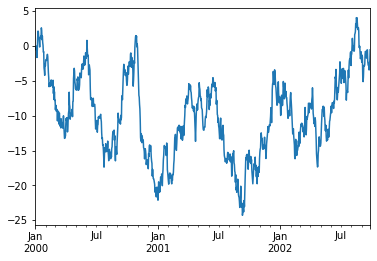

In [127]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot()

DataFrame에서 이 plot()메소드는 레이블이 있는 모든 열을 표시하는데 편리합니다.

<Figure size 432x288 with 0 Axes>

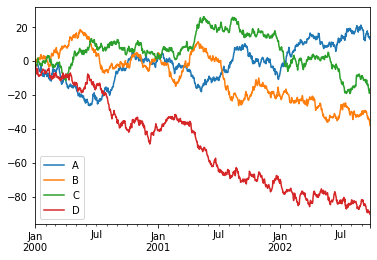

In [132]:
df = pd.DataFrame(
    np.random.randn(1000,4), index=ts.index, columns=["A","B","C","D"]
)

df = df.cumsum()

plt.figure()

df.plot()

plt.legend(loc='best')

# 데이터 입출력

## CSV

csv파일에 쓰는 중 입니다.

In [133]:
df.to_csv("foo.csv")

csv파일에서 읽기

In [134]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.946268,0.588085,-1.102185,-2.011696
1,2000-01-02,-0.940977,-0.645644,-2.615629,-2.244082
2,2000-01-03,0.448965,-0.183296,-2.437258,-3.986212
3,2000-01-04,-0.694449,-0.597946,-2.220138,-4.774340
4,2000-01-05,-0.909153,-0.200734,-2.831575,-5.637019
...,...,...,...,...,...
995,2002-09-22,14.836307,-33.955098,-16.642909,-88.413076
996,2002-09-23,13.802744,-34.419502,-17.817695,-88.713839
997,2002-09-24,14.080196,-34.360305,-19.016304,-89.204070
998,2002-09-25,13.348737,-36.193934,-18.960392,-89.111542


# HDF5

HDFStores 읽기 및 쓰기

HDF5 스토어에 쓰기

In [135]:
df.to_hdf("foo.h5", "df")

HDF5스토어에서 읽기

In [136]:
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,-0.946268,0.588085,-1.102185,-2.011696
2000-01-02,-0.940977,-0.645644,-2.615629,-2.244082
2000-01-03,0.448965,-0.183296,-2.437258,-3.986212
2000-01-04,-0.694449,-0.597946,-2.220138,-4.774340
2000-01-05,-0.909153,-0.200734,-2.831575,-5.637019
...,...,...,...,...
2002-09-22,14.836307,-33.955098,-16.642909,-88.413076
2002-09-23,13.802744,-34.419502,-17.817695,-88.713839
2002-09-24,14.080196,-34.360305,-19.016304,-89.204070
2002-09-25,13.348737,-36.193934,-18.960392,-89.111542


# 엑셀

MS Excel 읽기 및 쓰기

엑셀파일에 쓰기

In [137]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

엑셀 파일에서 읽기.

In [138]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.946268,0.588085,-1.102185,-2.011696
1,2000-01-02,-0.940977,-0.645644,-2.615629,-2.244082
2,2000-01-03,0.448965,-0.183296,-2.437258,-3.986212
3,2000-01-04,-0.694449,-0.597946,-2.220138,-4.774340
4,2000-01-05,-0.909153,-0.200734,-2.831575,-5.637019
...,...,...,...,...,...
995,2002-09-22,14.836307,-33.955098,-16.642909,-88.413076
996,2002-09-23,13.802744,-34.419502,-17.817695,-88.713839
997,2002-09-24,14.080196,-34.360305,-19.016304,-89.204070
998,2002-09-25,13.348737,-36.193934,-18.960392,-89.111542


# 고차

작업을 수행하려는 경우 다음과 같은 예외가 표시될 수 있습니다.

In [140]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: ignored